In [14]:
import pandas as pd 
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

import matplotlib.pyplot as plt

In [15]:
dataset = load_iris()

In [16]:
# Normaliza os dados para um intevalo de -1 a 1 
X = dataset["data"]
X = StandardScaler().fit_transform(X) 

In [17]:
# Realiza PCA para cada dimensão do conjunto de dados
N_COMPONENTS = 4

pca = PCA(n_components=N_COMPONENTS)
pc_components = pca.fit_transform(X)

pcas_variation = pca.explained_variance_ratio_

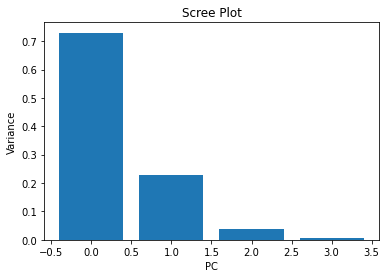

In [18]:
plt.bar(x=range(N_COMPONENTS) , height=pcas_variation)
plt.ylabel("Variance")
plt.xlabel("PC")
plt.title("Scree Plot")
plt.show()

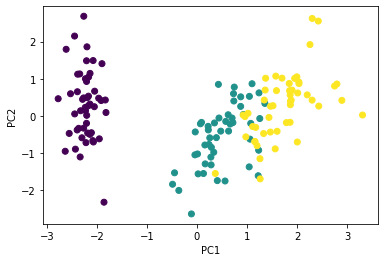

A variação total de PC1 e PC2 é 0.9581320720000165



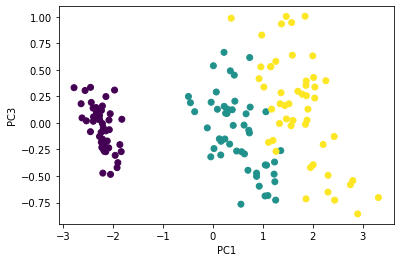

A variação total de PC1 e PC3 é 0.7663136730258274


In [19]:
pc1 = pc_components[:, 0]
pc2 = pc_components[:, 1]
pc3 = pc_components[:, 2]
labels = dataset['target']

# Plot para PC1 e PC2
plt.scatter(pc1, pc2, c=labels)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()
print(f"A variação total de PC1 e PC2 é {pcas_variation[0]+ pcas_variation[1]}")

print("")

# Plot para PC1 e PC3
plt.scatter(pc1, pc3, c=labels)
plt.ylabel("PC3")
plt.xlabel("PC1")
plt.show()

print(f"A variação total de PC1 e PC3 é {pcas_variation[0]+ pcas_variation[2]}")

In [20]:
# Cria conjunto de dados usando PC1 e PC2 
X1 = np.array(list(zip(pc1,pc2)))
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, dataset["target"], test_size=0.33, random_state=42)

# Cria conjunto de dados usando PC1 e PC3
X2 = np.array(list(zip(pc1,pc3)))
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, dataset["target"], test_size=0.33, random_state=42)

In [21]:
N_CLUSTERS = 3
MAX_ITER = 400 
TOL = 1e-6

model_x1 = KMeans(n_clusters=N_CLUSTERS, max_iter=MAX_ITER, tol=TOL, random_state=0)
model_x2 = KMeans(n_clusters=N_CLUSTERS, max_iter=MAX_ITER, tol=TOL, random_state=0)

model_x1.fit(x_train1)
model_x2.fit(x_train2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=1e-06, verbose=0)

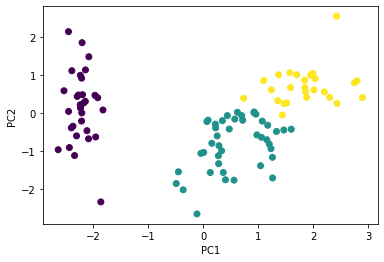

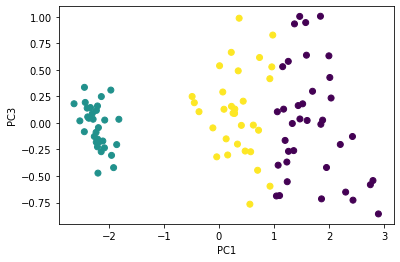

In [22]:
# Plot para PC1 e PC2
plt.scatter(x_train1[:, 0], x_train1[:, 1], c=model_x1.labels_)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

print("")

# Plot para PC1 e PC3
plt.scatter(x_train2[:, 0], x_train2[:, 1], c=model_x2.labels_)
plt.ylabel("PC3")
plt.xlabel("PC1")
plt.show()

In [23]:
# Etapa de test para o modelo treinado em PC1 e PC2
labels_pred = model_x1.predict(x_test1)

rand_score = metrics.adjusted_rand_score(y_test1, labels_pred)
mutual_info_score = metrics.adjusted_mutual_info_score(y_test1, labels_pred)  

print("Resultados do modelo treinado em PC1 e PC2") 
print(f"rand score = {rand_score}")
print(f"mutual info score = {mutual_info_score}")

Resultados do modelo treinado em PC1 e PC2
rand score = 0.6097341185680087
mutual info score = 0.6315742009236185


In [24]:
# Etapa de test para o modelo treinado em PC1 e PC3
labels_pred = model_x2.predict(x_test2)

rand_score = metrics.adjusted_rand_score(y_test2, labels_pred)
mutual_info_score = metrics.adjusted_mutual_info_score(y_test2, labels_pred)  

print("Resultados do modelo treinado em PC1 e PC3") 
print(f"rand score = {rand_score}")
print(f"mutual info score = {mutual_info_score}")

Resultados do modelo treinado em PC1 e PC3
rand score = 0.7992918324064046
mutual info score = 0.7814478288785512
